#LINEAR BANDITS

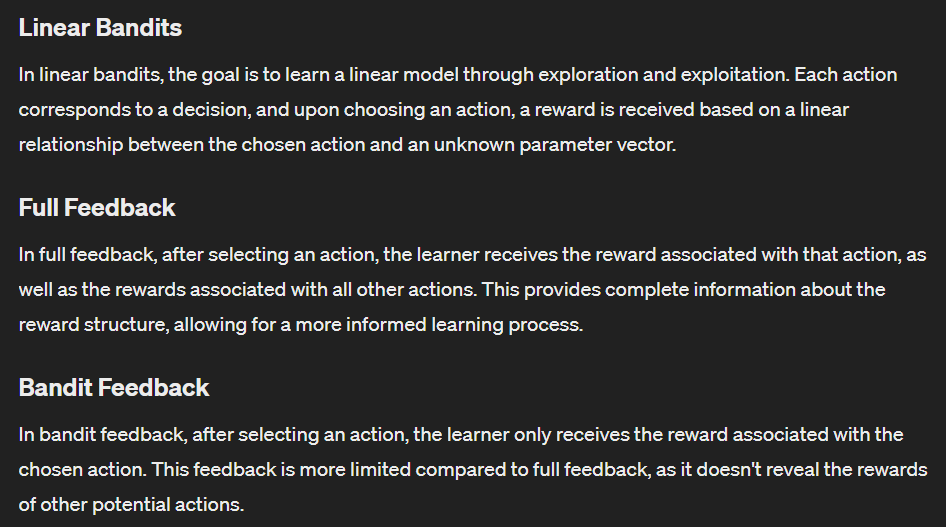

In [ ]:
import numpy as np

class FullFeedbackLinearBandit:
    def __init__(self, n_actions, n_features, alpha=0.1):
        self.n_actions = n_actions
        self.n_features = n_features
        self.alpha = alpha  # learning rate
        self.A = np.identity(n_features)  # covariance matrix
        self.b = np.zeros(n_features)  # parameter vector

    def choose_action(self, features):
        # Thompson sampling to choose action based on posterior distribution
        theta = np.random.multivariate_normal(self.b, np.linalg.inv(self.A))
        action_values = np.dot(features, theta)
        chosen_action = np.argmax(action_values)
        print(f"Chose action: {chosen_action}")
        return chosen_action

    def update(self, action, reward, features):
        # Update A and b using full feedback
        self.A += np.outer(features, features)
        self.b += reward * features
        print(f"Received reward: {reward}")

    def train(self, n_rounds, features_matrix, rewards_matrix):
        for t in range(n_rounds):
            features = features_matrix[t]
            rewards = rewards_matrix[t]
            chosen_action = self.choose_action(features)
            reward = rewards[chosen_action]
            self.update(chosen_action, reward, features)

In [ ]:
import numpy as np

class BanditFeedbackLinearBandit:
    def __init__(self, n_actions, n_features, alpha=0.1):
        self.n_actions = n_actions
        self.n_features = n_features
        self.alpha = alpha  # learning rate
        self.A = np.identity(n_features)  # covariance matrix
        self.b = np.zeros(n_features)  # parameter vector

    def choose_action(self, features):
        # Choose action based on current parameter estimates
        action_values = np.dot(features, self.b)
        chosen_action = np.argmax(action_values)
        print(f"Chose action: {chosen_action}")
        return chosen_action

    def update(self, action, reward, features):
        # Update A and b using bandit feedback
        self.A += np.outer(features, features)
        self.b += self.alpha * (reward - np.dot(features, self.b)) * features
        print(f"Received reward: {reward}")

    def train(self, n_rounds, features_matrix, rewards_matrix):
        for t in range(n_rounds):
            features = features_matrix[t]
            rewards = rewards_matrix[t]
            chosen_action = self.choose_action(features)
            reward = rewards[chosen_action]
            self.update(chosen_action, reward, features)

In [ ]:
# Example usage with prints
n_actions = 5
n_features = 3
n_rounds = 10  # reduced number of rounds for demonstration

# Generate synthetic data
true_theta = np.random.rand(n_features)
features_matrix = np.random.rand(n_rounds, n_features)
true_rewards = np.dot(features_matrix, true_theta)
noise = np.random.randn(n_rounds, n_actions)
rewards_matrix = true_rewards[:, np.newaxis] + noise

# Instantiate and train Full Feedback bandit with prints
print("Training Full Feedback Bandit...")
full_feedback_bandit = FullFeedbackLinearBandit(n_actions, n_features)
full_feedback_bandit.train(n_rounds, features_matrix, rewards_matrix)

# Instantiate and train Bandit Feedback bandit with prints
print("\nTraining Bandit Feedback Bandit...")
bandit_feedback_bandit = BanditFeedbackLinearBandit(n_actions, n_features)
bandit_feedback_bandit.train(n_rounds, features_matrix, rewards_matrix)

Training Full Feedback Bandit...
Chose action: 0
Received reward: -0.22970462260774177
Chose action: 0
Received reward: -0.4850579910124196
Chose action: 0
Received reward: -0.014893679652088598
Chose action: 0
Received reward: 0.7049058983089471
Chose action: 0
Received reward: -0.539754965242598
Chose action: 0
Received reward: -0.9805188659013372
Chose action: 0
Received reward: 1.3079486434264902
Chose action: 0
Received reward: 1.9416361085632285
Chose action: 0
Received reward: 0.8898348759499181
Chose action: 0
Received reward: -1.2106526155251285

Training Bandit Feedback Bandit...
Chose action: 0
Received reward: -0.22970462260774177
Chose action: 0
Received reward: -0.4850579910124196
Chose action: 0
Received reward: -0.014893679652088598
Chose action: 0
Received reward: 0.7049058983089471
Chose action: 0
Received reward: -0.539754965242598
Chose action: 0
Received reward: -0.9805188659013372
Chose action: 0
Received reward: 1.3079486434264902
Chose action: 0
Received reward: